In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import KBinsDiscretizer
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [9]:
# Load and bin the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned_data = discretizer.fit_transform(df)
binned_df = pd.DataFrame(binned_data, columns=df.columns)
category_map = {0.0: 'Low', 1.0: 'Med', 2.0: 'High'}
for col in binned_df.columns:
    binned_df[col] = binned_df[col].map(category_map)

In [11]:
# Convert to item format
transactions = binned_df.apply(lambda row: [f"{col}={val}" for col, val in row.items()], axis=1)

In [12]:
# One-hot encode
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)


In [13]:
# Apriori and rules
frequent_itemsets = apriori(transaction_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)# Convert each value to item format: "feature=value"
transactions = binned_df.apply(lambda row: [f"{col}={val}" for col, val in row.items()], axis=1)


In [14]:
# Print results
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
# One-hot encode the transactions
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

Frequent Itemsets:
      support                                           itemsets
0   0.306667                           (petal length (cm)=High)
1   0.333333                            (petal length (cm)=Low)
2   0.360000                            (petal length (cm)=Med)
3   0.320000                            (petal width (cm)=High)
4   0.333333                             (petal width (cm)=Low)
5   0.346667                             (petal width (cm)=Med)
6   0.346667                            (sepal length (cm)=Low)
7   0.466667                            (sepal length (cm)=Med)
8   0.313333                             (sepal width (cm)=Low)
9   0.586667                             (sepal width (cm)=Med)
10  0.273333    (petal width (cm)=High, petal length (cm)=High)
11  0.333333      (petal width (cm)=Low, petal length (cm)=Low)
12  0.300000     (sepal length (cm)=Low, petal length (cm)=Low)
13  0.240000      (sepal width (cm)=Med, petal length (cm)=Low)
14  0.313333      (p

In [15]:
# Plotting function
def plot_scatter_support_confidence(rules):
    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c='blue')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs. Confidence')
    plt.grid(True)
    plt.show()# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.2, use_colnames=True)

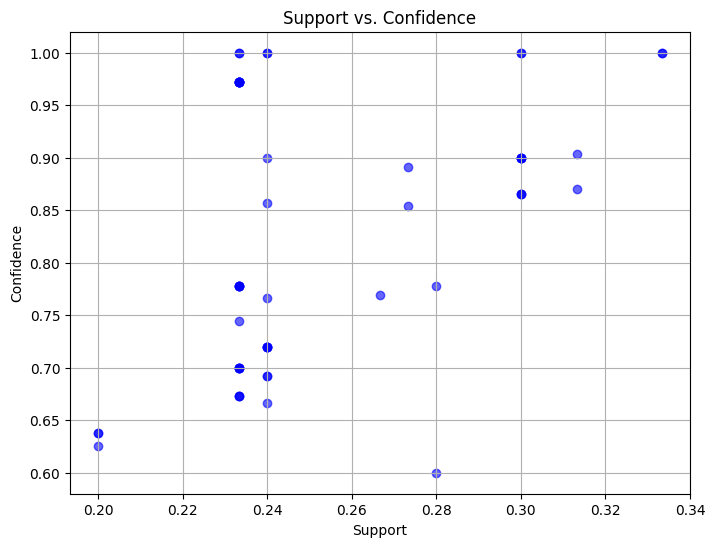

In [16]:
# Call plot
plot_scatter_support_confidence(rules)# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)